In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("data/Admittance.csv")
data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [3]:
data["Admitted"] = data["Admitted"].map({"No":0,"Yes":1})

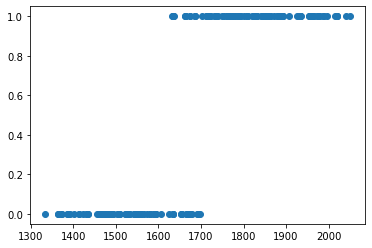

In [4]:
plt.scatter(data["SAT"],data["Admitted"]);

In [5]:
label = "Admitted"
X = data.drop(label,axis=1)
y = data[label]

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)  # Accuracy

0.9117647058823529

In [20]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score

def evaluate_classification_model(model,X_test,y_test):
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test,y_pred):.4f}")
    print(f"Recall: {recall_score(y_test,y_pred):.4f}")
    print(f"Precision: {precision_score(y_test,y_pred):.4f}")
    print(f"F1: {f1_score(y_test,y_pred):.4f}")
    conf_mat = confusion_matrix(y_test,y_pred)
    sns.heatmap(conf_mat, annot=True, fmt="d",
                xticklabels=lr.classes_, yticklabels=lr.classes_)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()
    
    fpr, tpr, _ = roc_curve(y_test,  y_pred)
    auc = roc_auc_score(y_test, y_pred)
    plt.plot(fpr,tpr,label=f"AUC={auc:.2f}")
    plt.legend(loc=4)
    plt.show()

Accuracy: 0.9118
Recall: 0.9000
Precision: 0.9474
F1: 0.9231


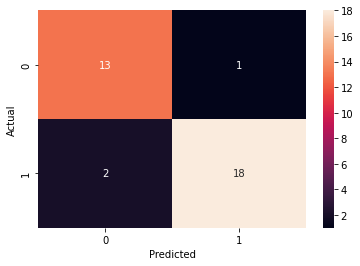

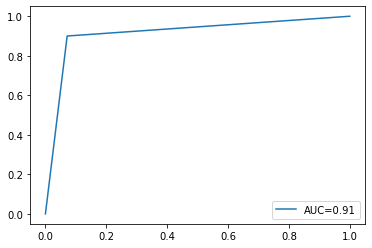

In [21]:
evaluate_classification_model(lr,X_test,y_test)

Accuracy: 0.9118
Recall: 0.8500
Precision: 1.0000
F1: 0.9189


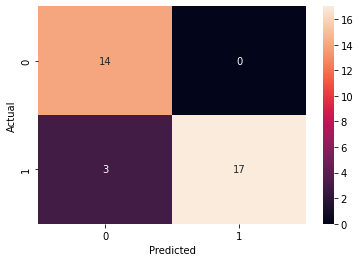

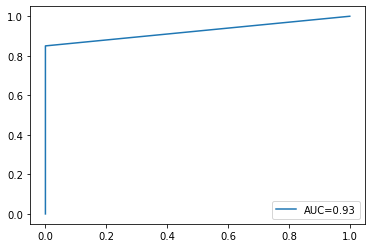

In [22]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
evaluate_classification_model(dt,X_test,y_test)

Accuracy: 0.9118
Recall: 0.9000
Precision: 0.9474
F1: 0.9231


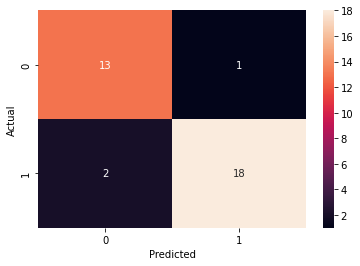

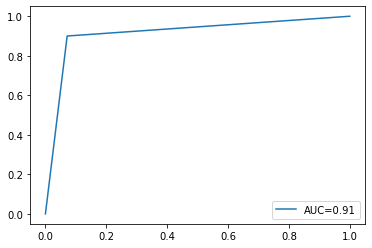

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
evaluate_classification_model(rf,X_test,y_test)

Accuracy: 0.9118
Recall: 0.9500
Precision: 0.9048
F1: 0.9268


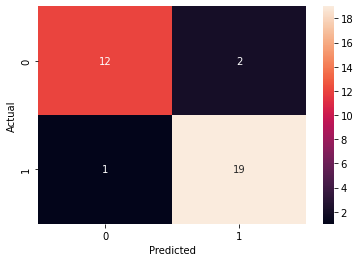

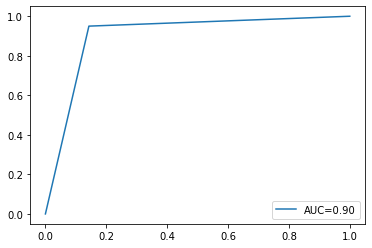

In [24]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,y_train)
evaluate_classification_model(svc,X_test,y_test)

[14:36:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.9118
Recall: 0.8500
Precision: 1.0000
F1: 0.9189


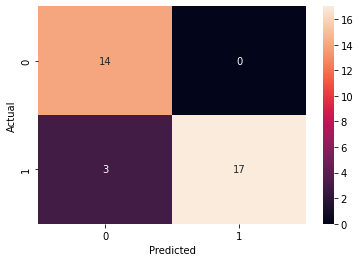

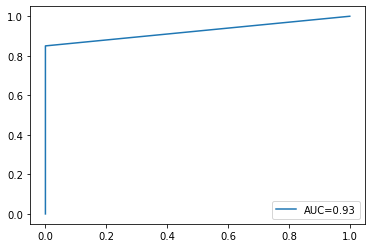

In [27]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train,y_train)
evaluate_classification_model(xgb,X_test,y_test)

Accuracy: 0.9118
Recall: 0.9000
Precision: 0.9474
F1: 0.9231


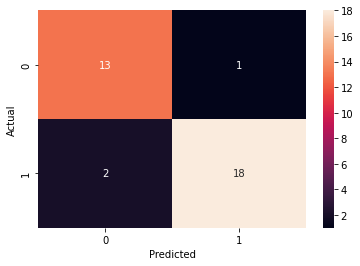

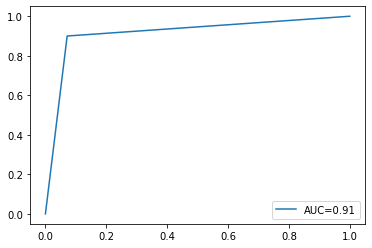

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
evaluate_classification_model(knn,X_test,y_test)